**PRACTICA 6 FILTRADO**

**4.1 Creación de la señal**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

- Genere las secuencias ficticias xe(n) y ye(n), implemente w(n) como una secuencia de ruido gaussiano con media cero y varianza 0.01, estableza alfa=0.8 y un retraso D=15 muestras. Grafique ambas señales.

In [2]:
#Creación de la señal
f0= 0.01 #Hz
fs=25 #Hz
alfa=0.8 #atenuación
D=15 #retraso, muestras
var=0.01 #del ruido
media= 0 #del ruido
n=np.arange(0,1001,1/fs) # 0 < n < 1000
x_e=np.sin(2*np.pi*f0*(n+D/fs)) #potencial con retraso
w=np.random.normal(media,np.sqrt(var),len(n)) #ruido gaussiano
y_e=alfa*x_e+w #señal con ruido y retraso

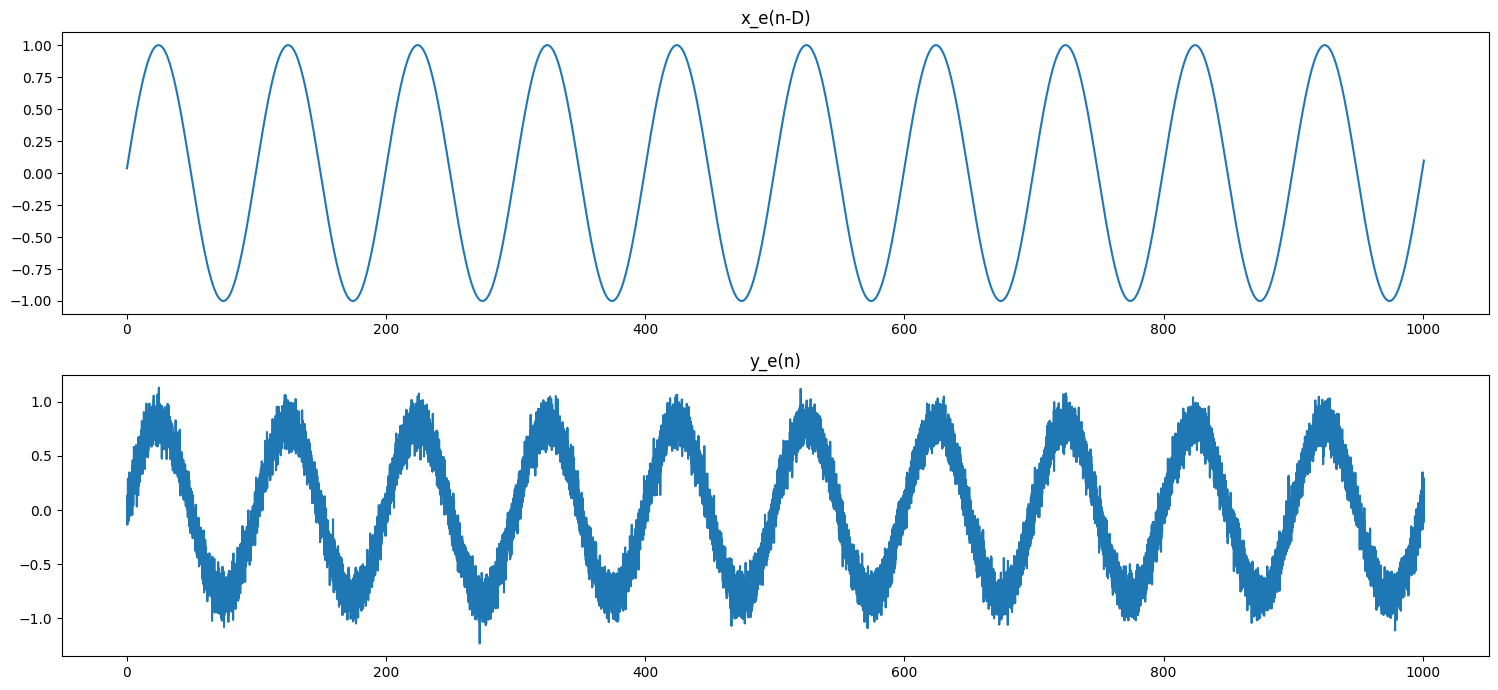

In [3]:
#grafica
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(n,x_e)
plt.title('x_e(n-D)')
plt.subplot(212)
plt.plot(n,y_e)
plt.title('y_e(n)')
plt.tight_layout()

**4.2 Diseño de un filtro**

- Diseñe un filtro FIR pasa bajas para la señal ye(n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

In [5]:
#lowpass
order= 30
nyquist=fs/2
wn_low=1.25/nyquist #frec corte normalizada con nyquist
lowpass=signal.firwin(order+1,wn_low,pass_zero='lowpass',window='hamming') #pasabajas

- ¿Qué cambios hay en los argumentos de la unción para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

Para implementar un filtro pasa altas se debe de poner como argumento en la función firwin *pass_zero='highpass'*. De la misma manera para la implementación de un pasa bandas se debe de poner *pass_zero='bandpass'* y además al especificar la frecuencia de corte se debe de ingresar de la siguiente forma: [fmin,fmax]; que indican los bordes de la banda.

In [6]:
#highpass
wn_high=7.5/nyquist
highpass=signal.firwin(order+1,wn_high,pass_zero='highpass',window='hamming')

#bandpass
bandpass=signal.firwin(order+1,[wn_low,wn_high],pass_zero='bandpass',window='hamming')

- Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

In [16]:
#lowpass
b_low,a_low=signal.iirfilter(order,wn_low,btype='lowpass')

#highpass
b_high,a_high=signal.iirfilter(order,wn_high,btype='highpass')

#bandpass
b_band,a_band=signal.iirfilter(order,[wn_low,wn_high],btype='bandpass')

**4.3 Filtrado**

- Pruebe dichos comandos (filtfilt, lfilter) utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal ye(n) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

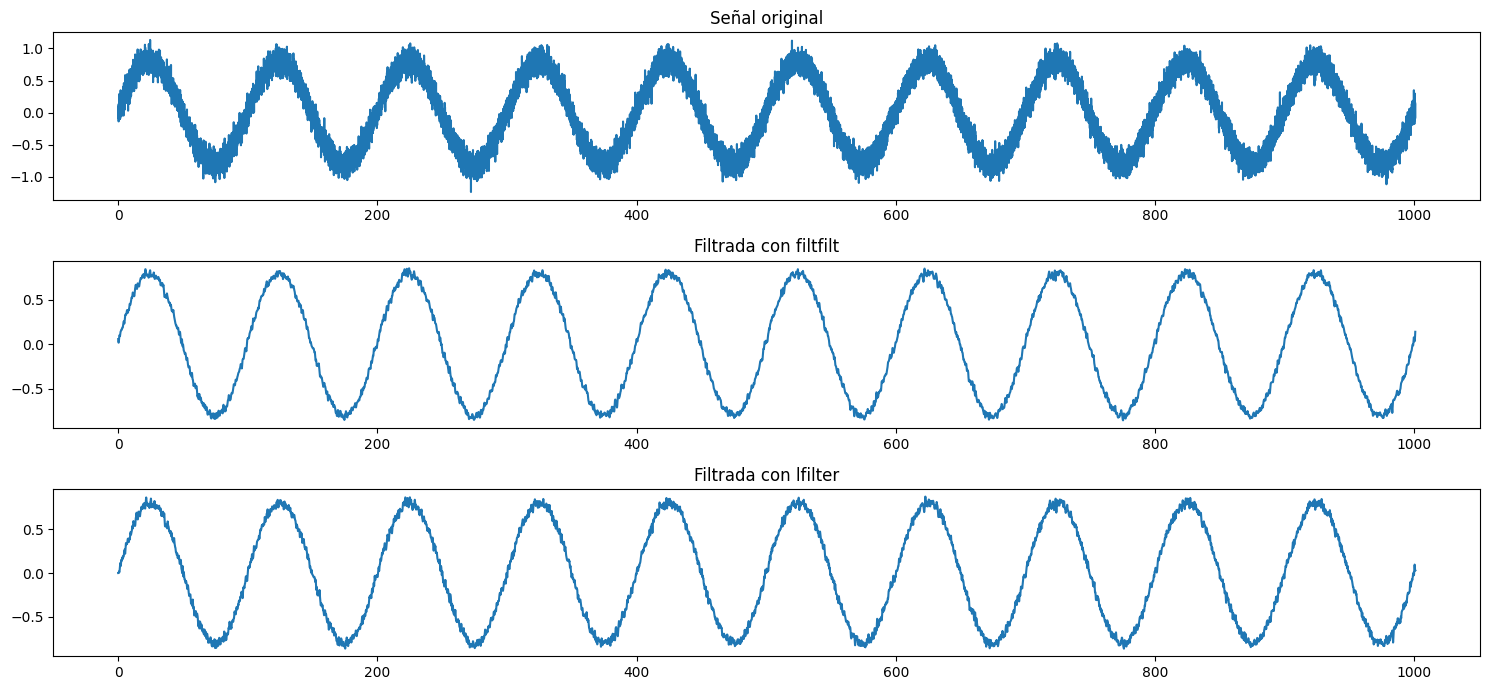

In [20]:
y_FIR=signal.filtfilt(b=lowpass,a=1,x=y_e) #aplicación del filtro
y_FIR2=signal.lfilter(b=lowpass,a=1,x=y_e)
plt.figure(figsize=(15,7))
plt.subplot(311)
plt.plot(n,y_e)
plt.title('Señal original')
plt.subplot(312)
plt.plot(n,y_FIR)
plt.title('Filtrada con filtfilt')
plt.subplot(313)
plt.plot(n,y_FIR2)
plt.title('Filtrada con lfilter')
plt.tight_layout()

Sólo se utiliza el numerador porque en los filtros FIR el denominador de la función de transferencia de la respuesta al impulso es igual a 1, es decir, todos los coeficientes del denominador (que es el input) son igual a cero. En ese sentido, el numerador hace referencia a los coeficientes del output con el que se define la función de transferencia.


Se puede ver que la función *filtfilt* parece filtrar mejor la señal que *lfilter*, que parece ligeramente más ruidosa. Esto se debe a que la función *filtfilt* aplica el filtro dos veces a la señal.

- Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal ye(n) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

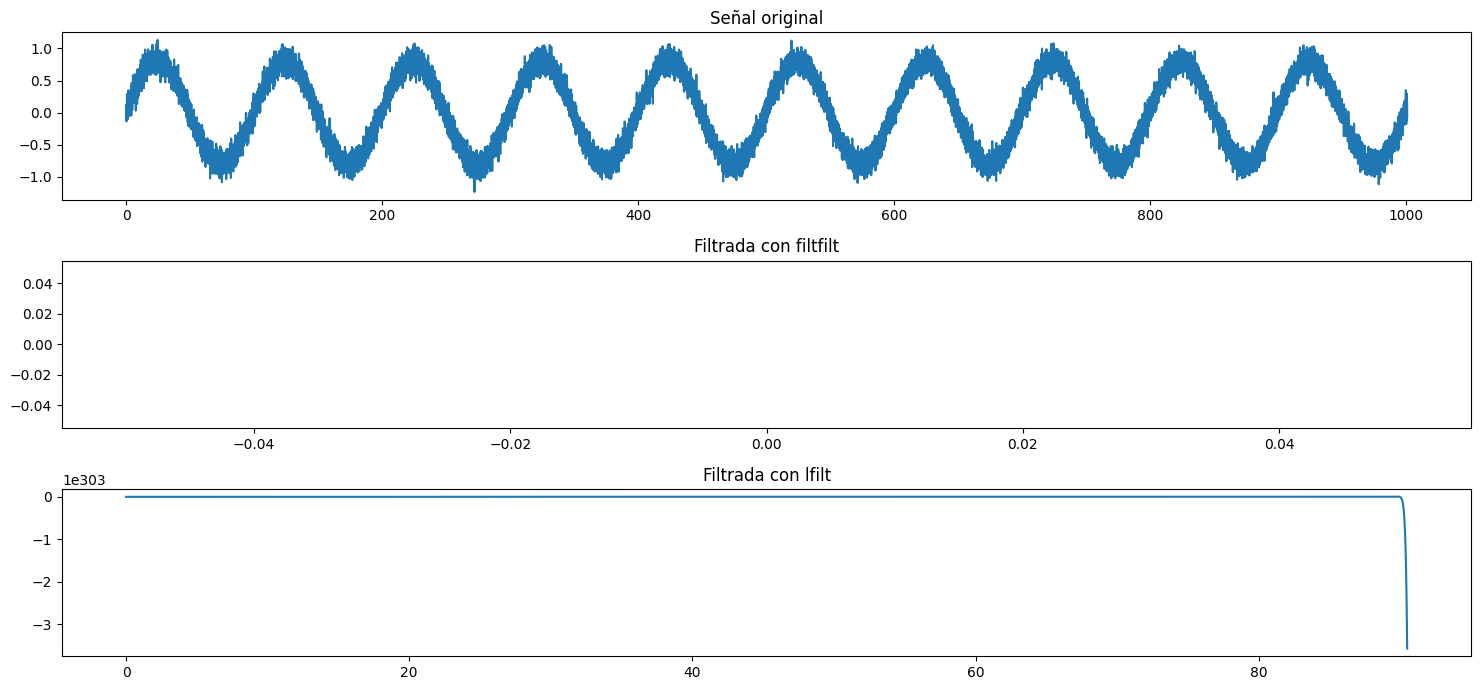

In [23]:
y_IIR=signal.filtfilt(b=b_low,a=a_low,x=y_e)
y_IIR2=signal.lfilter(b=b_low,a=a_low,x=y_e)
plt.figure(figsize=(15,7))
plt.subplot(311)
plt.plot(n,y_e)
plt.title('Señal original')
plt.subplot(312)
plt.plot(n,y_IIR)
plt.title('Filtrada con filtfilt')
plt.subplot(313)
plt.plot(n,y_IIR2)
plt.title('Filtrada con lfilt')
plt.tight_layout()

**4.4 Aplicación**

- Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice

- Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

- Grafique un segmenteo de las señales antes y después de filtrar, analice los cambios.

In [9]:
from scipy.signal import welch
from scipy.signal import firwin, lfilter

# Cargar la señal desde el archivo señal_filtros.txt
data = np.loadtxt(r"C:\Users\MATEO\Desktop\LAB-BIOSE-ALES\senal_filtros.txt")

# Extraer el canal 1 de la señal
canal_1 = data[:, 0]

# Verificar la forma de la señal cargada
print("Forma de la señal cargada:", canal_1.shape)

Forma de la señal cargada: (60000,)


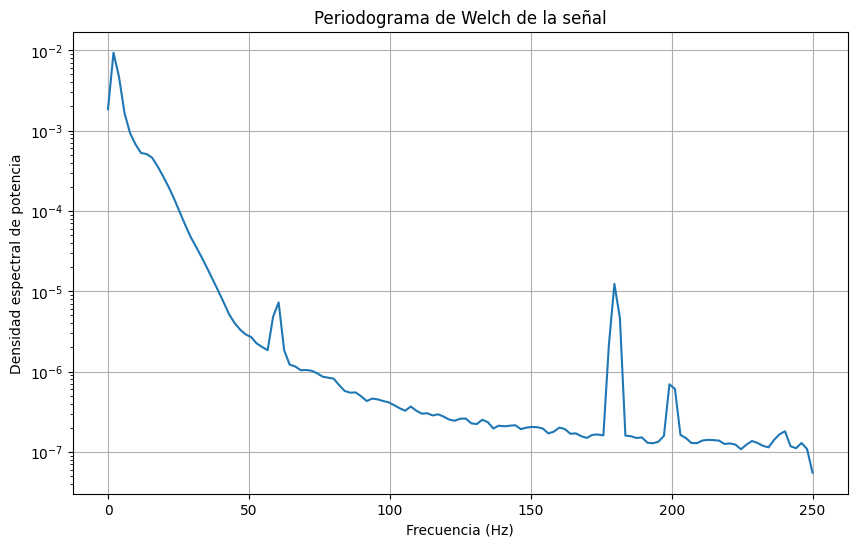

In [10]:
# Definir la frecuencia de muestreo (500 Hz según tu descripción)
fs = 500

# Calcular el periodograma de Welch
frequencies, power_spectrum = welch(canal_1, fs=fs)

# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal')
plt.grid(True)
plt.show()

La DSP de una señal sin ruido eléctrico es típicamente suave y continua. Si el periodograma de Welch presenta picos bruscos o irregularidades, esto puede ser un indicio de la presencia de ruido eléctrico.

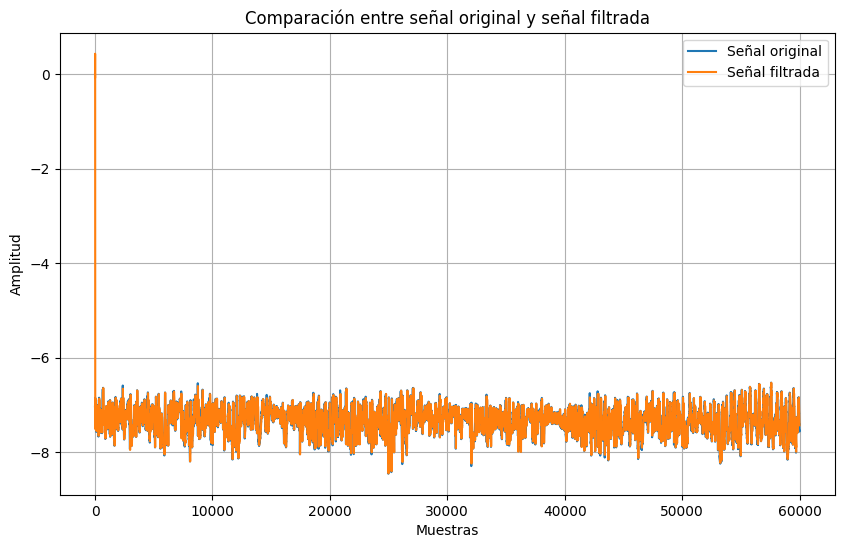

In [11]:
# Parámetros del filtro FIR
Fc_noise = 50  # Frecuencia de corte para eliminar ruido
order = 30  # Orden del filtro

# Diseñar el filtro FIR para eliminar ruido
h_noise_removal = firwin(order+1, Fc_noise / (fs / 2))

# Aplicar el filtro FIR a la señal
canal_1_filtered = lfilter(h_noise_removal, 1, canal_1)

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(canal_1, label='Señal original')
plt.plot(canal_1_filtered, label='Señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Comparación entre señal original y señal filtrada')
plt.grid(True)
plt.show()

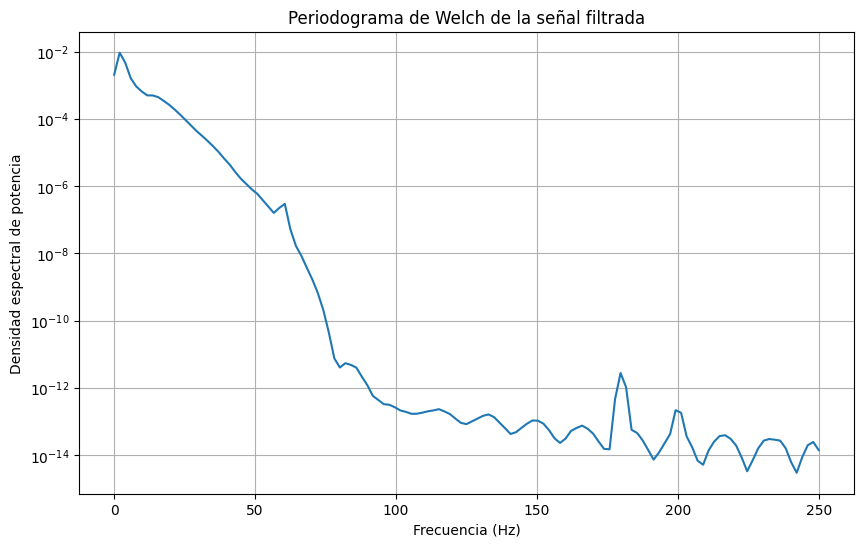

In [12]:
# Calcular el periodograma de Welch de la señal filtrada
frequencies_filtered, power_spectrum_filtered = welch(canal_1_filtered, fs=fs)

# Graficar el periodograma de Welch de la señal filtrada
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies_filtered, power_spectrum_filtered)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal filtrada')
plt.grid(True)
plt.show()

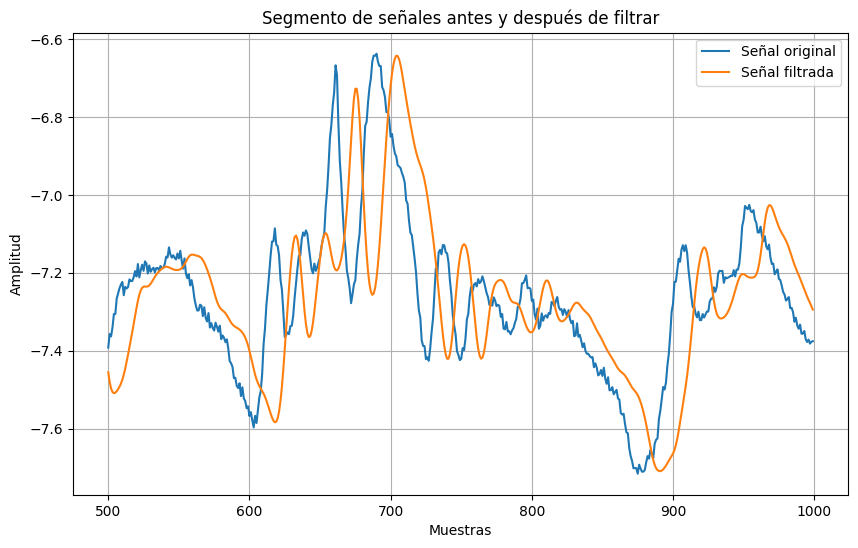

In [13]:
# Definir el intervalo de muestras a graficar (por ejemplo, de la muestra 500 a la 1000)
inicio_segmento = 500
fin_segmento = 1000

# Graficar el segmento de las señales antes y después de filtrar
plt.figure(figsize=(10, 6))
plt.plot(np.arange(inicio_segmento, fin_segmento), canal_1[inicio_segmento:fin_segmento], label='Señal original')
plt.plot(np.arange(inicio_segmento, fin_segmento), canal_1_filtered[inicio_segmento:fin_segmento], label='Señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Segmento de señales antes y después de filtrar')
plt.grid(True)
plt.show()